In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import math
import matplotlib
import pandas
import glob
import ast
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from diameter_tools import get_trunk_diam

In [4]:
def load_data() -> pandas.DataFrame:
    a = glob.glob('data/*.csv')

    data = None
    l = []
    for f in a:
        dataset = pandas.read_csv(f)
        l.append(dataset)
    data = pandas.concat(l)
    return data

data = load_data()


In [5]:
data.set_index('id')


,Aktualność danych na dzień,Jednostka zarządzająca,Nazwa polska,Nazwa łacińska,Numer inwentaryzacyjny,Obwód pnia w cm,Wysokość w m,gtype,height,id.1,imgurl,width,x,y
id,,,,,,,,,,,,,,
AAKG9OAAnAAF1O1AAG,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253003,98,14,2001,3,AAKG9OAAnAAF1O1AAG,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3,7.503078e+06,5.792584e+06
AAKG9OAAnAAF1O1AAI,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253005,"17, 9, 8, 10, 11",5,2001,1,AAKG9OAAnAAF1O1AAI,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.503081e+06,5.792579e+06
AAKG9OAAnAAF1O1AAK,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253007,20,5,2001,1,AAKG9OAAnAAF1O1AAK,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.503081e+06,5.792575e+06
AAKG9OAAnAAF1O1AAJ,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253006,30,4.5,2001,1,AAKG9OAAnAAF1O1AAJ,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.503083e+06,5.792575e+06
AAKG9OAAnAAF1O1AAH,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253004,"120, 10, 11, 8",14,2001,3,AAKG9OAAnAAF1O1AAH,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3,7.503084e+06,5.792577e+06
AAKG9OAAnAAF1OUAAW,24.04.2012,Dzielnica Targówek,klon jesionolistny,Acer negundo,D253784,"79, 53, 36",10,2001,2,AAKG9OAAnAAF1OUAAW,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,2,7.503096e+06,5.792572e+06
AAKG9OAAnAAF1OUAAV,24.04.2012,Dzielnica Targówek,klon jesionolistny,Acer negundo,D253783,95,12,2001,3,AAKG9OAAnAAF1OUAAV,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3,7.503097e+06,5.792573e+06
AAKG9OAAnAAF1OUAAX,24.04.2012,Dzielnica Targówek,topola czarna,Populus nigra,D253785,286,17,2001,3,AAKG9OAAnAAF1OUAAX,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3,7.503106e+06,5.792588e+06
AAKG9OAAnAAF1OUAAY,24.04.2012,Dzielnica Targówek,klon jesionolistny,Acer negundo,D253786,"55, 35",7,2001,2,AAKG9OAAnAAF1OUAAY,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,2,7.503117e+06,5.792612e+06


In [6]:
data['Obwód pnia w cm'].isna().sum()

2503

In [7]:
data['Wysokość w m'].isna().sum()

9935

In [8]:
def get_species_list(data: pandas.DataFrame) -> pandas.DataFrame:
    sp = pandas.DataFrame()
    sp['Nazwa łacińska'] = data['Nazwa łacińska']
    sp['Nazwa polska'] = data['Nazwa polska']
    species_unique = sp.drop_duplicates()
    return species_unique

species_unique = get_species_list(data)


In [9]:
data['norm'] = data['Obwód pnia w cm'].fillna('0')
data.dropna(subset=['Obwód pnia w cm', 'norm',], inplace=True)
data['norm'] = data['norm'].apply(pandas.Series)

In [10]:
data['normalized_trunk_diam'] = data['norm'].apply(get_trunk_diam)
data['normalized_trunk_diam'] = data['normalized_trunk_diam'] / 100

34 malformed node or string: 34 <class 'int'>
32 malformed node or string: 32 <class 'int'>
38 malformed node or string: 38 <class 'int'>
8 malformed node or string: 8 <class 'int'>
40 malformed node or string: 40 <class 'int'>
50 malformed node or string: 50 <class 'int'>
61 malformed node or string: 61 <class 'int'>
36 malformed node or string: 36 <class 'int'>
54 malformed node or string: 54 <class 'int'>
67 malformed node or string: 67 <class 'int'>
63 malformed node or string: 63 <class 'int'>
57.0 malformed node or string: 57.0 <class 'float'>


In [11]:
data['height'] = data['Wysokość w m'].fillna('0')
data['height'] = data['height'].str.replace(',', '.')
data['height'] = data['height'].astype(np.float)

In [12]:
df2 = data[['height', 'normalized_trunk_diam']]

In [13]:
df2.dropna(inplace=True)

/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26237 entries, 0 to 2287
Data columns (total 2 columns):
height                   26237 non-null float64
normalized_trunk_diam    26237 non-null float64
dtypes: float64(2)
memory usage: 614.9 KB


In [15]:
df2.head()

,height,normalized_trunk_diam
0,25.0,1.209578
1,6.5,0.187803
2,7.5,0.286479
3,5.0,0.168704
4,26.0,0.993127


In [16]:
df2.corr()

,height,normalized_trunk_diam
height,1.000000,0.325102
normalized_trunk_diam,0.325102,1.000000


In [17]:
df2.describe()

,height,normalized_trunk_diam
count,26237.000000,26237.000000
mean,5.841072,0.207773
std,12.874934,0.187604
min,0.000000,0.000000
25%,0.000000,0.082761
50%,4.000000,0.143239
75%,9.000000,0.280113
max,1402.000000,4.946536


Text(0.5, 1.0, 'Wykres wysokości drzew od średnicy pni')

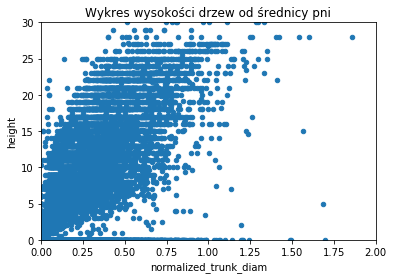

In [18]:
df2.plot(kind='scatter', x='normalized_trunk_diam', y='height', ylim=(0, 30), xlim=(0, 2))
plt.title('Wykres wysokości drzew od średnicy pni')

In [19]:
data.columns

Index(['id', 'Aktualność danych na dzień', 'Jednostka zarządzająca',
       'Nazwa polska', 'Nazwa łacińska', 'Numer inwentaryzacyjny',
       'Obwód pnia w cm', 'Wysokość w m', 'gtype', 'height', 'id.1', 'imgurl',
       'width', 'x', 'y', 'norm', 'normalized_trunk_diam'],
      dtype='object')